In [43]:
import spacy
from spacy import displacy
from bs4 import BeautifulSoup
import requests
import re
import matplotlib.pyplot as plt

# **Load Pre-trained spaCy Model**

In [44]:
# Load the default English language model for Named Entity Recognition (NER)
NER = spacy.load("en_core_web_sm")

/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


# **Perform NER on Sample Text**

In [45]:
text = "Apple is looking at buying a U.K. startup for $1 billion."

In [46]:
doc = NER(text)

In [47]:
# Print extracted entities
for ent in doc.ents:
    print(f"{ent.text} -> {ent.label_}")

Apple -> ORG
U.K. -> GPE
$1 billion -> MONEY


In [48]:
# Explain an entity type
spacy.explain('ORG')

'Companies, agencies, institutions, etc.'

In [49]:
# Visualizing Named Entities in Text
displacy.render(doc, style='ent', jupyter=True)

# **Web Scraping Wikipedia Article for Text**

In [50]:
url = 'https://en.wikipedia.org/wiki/Wikipedia'

In [51]:
response = requests.get(url)
soup = BeautifulSoup(response.text, "html.parser")

In [52]:
# Extract text from all paragraph tags
article_text = " ".join([p.text for p in soup.find_all("p")])
article_text

'\n Wikipedia[c] is a free-content online encyclopedia written and maintained by a community of volunteers, known as Wikipedians, through open collaboration and the wiki software MediaWiki. Wikipedia is the largest and most-read reference work in history,[3][4] and is consistently ranked among the ten most visited websites; as of December\xa02024[update], it was ranked fifth by Semrush,[5] and seventh by Similarweb.[6] Founded by Jimmy Wales and Larry Sanger on January 15, 2001, Wikipedia has been hosted since 2003 by the Wikimedia Foundation, an American nonprofit organization funded mainly by donations from readers.[7]\n Initially only available in English, Wikipedia now exists in more than 300 languages. The English Wikipedia, with over 7\xa0million articles, remains the largest of the editions, which together comprise more than 64 million articles and attract more than 1.5\xa0billion unique device visits and 13\xa0million edits per month (about 5\xa0edits per second on average)  as

# **Perform NER on Scraped Article Text**

In [53]:
doc = NER(article_text)
displacy.render(doc, style='ent', jupyter=True)

# **Organizing Extracted Entities into Dictionary**

In [54]:
entity_dict = {}
for ent in doc.ents:
    entity_dict.setdefault(ent.label_, []).append(ent.text)

In [55]:
# Print extracted entities categorized by type
for entity_type, values in entity_dict.items():
    print(f"{entity_type}: {values}")

NORP: ['Wikipedians', 'American', 'Bomis', 'Bomis', 'Bomis', 'Israeli', 'German', 'Japanese', 'English', 'English', 'German', 'American', 'competitive[81', 'Yasseri', 'non-English', 'Wikipedians', 'Africans', 'German', 'French', 'Swedish', 'Dutch', 'Russian', 'Spanish', 'Italian', 'Polish', 'Egyptian Arabic', 'Chinese', 'Japanese', 'Vietnamese', 'Portuguese', 'Persian', 'Catalan', 'Indonesian', 'Serbian', 'Korean', 'Norwegian', 'Turkish', 'interwiki', 'non-English', 'non-English', 'non-English', 'Christian', 'German', 'British', 'American', 'German', 'German', 'Swedish', 'Russian', 'Varnish', 'Varnish', 'Debian', 'Japanese', 'German', 'German', 'Russian', 'French', 'American', 'Mauritian', 'German', 'Wikipedians', 'Facebook', 'Facebook', 'Chinese', 'Reddit', 'Italian', 'Italian', 'American', 'American', 'Dilbert', 'American', 'French']
PRODUCT: ['MediaWiki', '17][65', 'Wikipedia,[W 51', 'Wikipedia citations.[169][170', 'Perl', 'IPs', 'Apache']
ORG: ['Wikipedia', 'the Wikimedia Foundati

# **Visualizing Entity Frequency using Matplotlib**

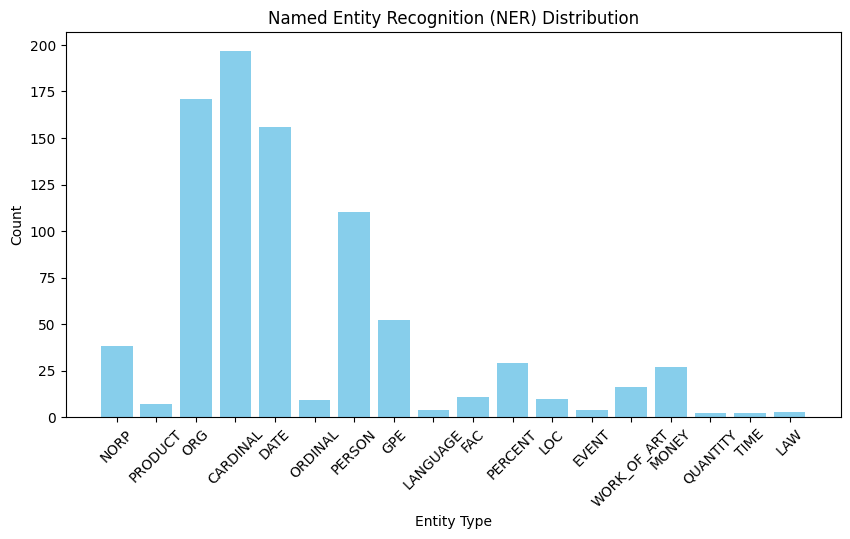

In [57]:
entity_counts = {key: len(set(value)) for key, value in entity_dict.items()}
plt.figure(figsize=(10, 5))
plt.bar(entity_counts.keys(), entity_counts.values(), color='skyblue')
plt.xlabel("Entity Type")
plt.ylabel("Count")
plt.title("Named Entity Recognition (NER) Distribution")
plt.xticks(rotation=45)
plt.show()

# **Displaying Entities in a Tabular Format using Rich Library**

In [61]:
from rich.console import Console
from rich.table import Table

console = Console()
table = Table(title="🔵 Named Entity Recognition (NER) Results", title_style="bold cyan", header_style="bold white on blue")
table.add_column("🔹 Entity Type", style="bold deep_sky_blue3", justify="center")
table.add_column("🔸 Entities", style="bold light_slate_grey", justify="left")

# Add extracted entities to the table with professional styling
for entity_type, values in entity_dict.items():
    table.add_row(f"[bold bright_white]{entity_type}[/bold bright_white]", f"[italic dark_sea_green3]{', '.join(set(values))}[/italic dark_sea_green3]")

# Print the formatted table with an aesthetically pleasing design
console.print(table)


                                     🔵 Named Entity Recognition (NER) Results                                     
┏━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ 🔹 Entity Type ┃ 🔸 Entities                                                                                    ┃
┡━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      NORP      │ Portuguese, Reddit, British, English, Dutch, French, Varnish, American, Indonesian, Korean,    │
│                │ Polish, Chinese, Catalan, Japanese, Egyptian Arabic, Mauritian, Swedish, Dilbert, non-English, │
│                │ Christian, Wikipedians, Bomis, Turkish, interwiki, Norwegian, Israeli, Serbian, Russian,       │
│                │ Vietnamese, German, Persian, Italian, competitive[81, Spanish, Debian, Africans, Facebook,     │
│                │ Yasseri                                                                                        │
│    PRODUCT     │ Perl, Wikipedia citations.[169][170, 17][65, Apache, MediaWiki, IPs, Wikipedia,[W 51           │
│      ORG       │ Sue Gardner.[W 67, the English Wikipedia, The Parliament of Canada's, Google.[W, MIT           │
│                │ Technology Review, São Paulo.[W, Scholarpedia, Legal Research, Wikipediocracy, iPhone,         │
│                │ Beresheet, the Internet Watch Foundation, the University of East Anglia, Wikimedia, the World  │
│                │ Intellectual Property, the Wireless Application Protocol, Signpost, the Oxford Internet        │
│                │ Institute, Berkman Klein Center for Internet & Society, Bigipedia, the Columbia Journalism     │
│                │ Review, PageRank, Wapedia, RNA Biology, ICE Publishing, CamelCase, Nupedia.[W, the Journal of  │
│                │ Documentation, The Office, journals,[59, BBC Radio, the American Library Association, United   │
│                │ States Army, Eckart Höfling, The Arbitration Committee, Education Next, BBC Micro, BBC         │
│                │ Domesday Project, Online Safety Bill, the University of Oxford, GFDL, the Domesday Project,    │
│                │ Google, Stony Brook University's, The Sydney Morning Herald, Technology Review, Times,         │
│                │ American Life, Enciclopedia Libre, the Spanish Wikipedia, PLOS One, Carnegie Mellon            │
│                │ University, the Civil Marriage, CollegeHumor, Quadriga A Mission of Enlightenment, YouTube,    │
│                │ Fox News, Harvard Crimson, The New York Times, The Journal of Academic Librarianship,          │
│                │ Foundation, the Arbitration Committee, Nupedia Open Content License, CirrusSearch, SOPA, POV,  │
│                │ the University of San Francisco, The English, Wikimedia Foundation, Slate, Wikiversity,        │
│                │ en.mobile.wikipedia.org, Wales, 2020 Internal Revenue Service, the Performing Arts, Perry Cox, │
│                │ organization".[111, Yale, The Wikimedia Foundation's, Encyclopedia of Life, the Rey Juan       │
│                │ Carlos University, VisualEditor, the Spanish Princess of Asturias Award, Dartmouth College,    │
│                │ UseModWiki, Paul Sabatier University, the New York Public Library, Meta-Wiki, OpenMoko, New    │
│                │ York University, Quaker, WikiProject Medicine's, Cebuano, Time, the Federal Bureau of          │
│                │ Investigation, the Wikimedia Foundation".[W 28, USA Today, Tron, Wall Street Journal,          │
│                │ Wikidata, the Palo Alto Research Center, CC BY-SA, Croatia, Scientology, Lee Daniel Crocker,   │
│                │ Reuters, Harvard University, Maher, The Wikimedia Foundation, The Economic Times, College of   │
│                │ Business, the Free Software Foundation, The Chronicle of Higher Education, The Wikipedia       │
│                │ Library, Reference.com, GPL, the World H